

> Link with google drive to get dataset



In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


> Import Liberaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

> Load Dataset And see Insites about data

In [8]:
# Define the path to the dataset in your Google Drive
# Make sure to replace 'your_dataset_name.csv' with the actual name of your file
file_path = '/content/drive/MyDrive/Dataset_Salary/Experience-Salary.csv'
# Load the dataset into a pandas DataFrame

df = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print("\n Dataset Info:")
# show first 5 rows
display(df.head(5))
# show if Non and column rows
display(df.info())
# show some mathematical insites
display(df.describe())


Dataset loaded successfully!

 Dataset Info:


,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


None

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


> Prepare data for training

In [9]:
x= df.iloc[:,[0]].values # years of exp
y= df.iloc[:,1].values # Salary
print(x.shape) #matrix
print(y.shape) #victor

(1000, 1)
(1000,)


>  Split data into training and testing sets


In [11]:
# from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
print(f" Training set: {x_train.shape[0]} samples")
print(f" Test set: {x_test.shape[0]} samples")

 Training set: 800 samples
 Test set: 200 samples


> ###  Training Linear Regression Model

In [17]:
# Initialize and train the model
regressor=LinearRegression()
regressor.fit(x_train,y_train)

# Make predictions
y_pred=regressor.predict(x_test)

> ### Model Evaluation

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f" Mean Absolute Error (MAE): ${mae:,.2f}")
print(f" Mean Squared Error (MSE): ${mse:,.2f}")
print(f" Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f" R-squared Score: {r2:.4f}")

 Mean Absolute Error (MAE): $3.72
 Mean Squared Error (MSE): $22.40
 Root Mean Squared Error (RMSE): $4.73
 R-squared Score: 0.7462


> ### Model Equation


In [24]:
print(f"   Salary = {regressor.intercept_:,.2f} + {regressor.coef_[0]:,.2f} × Experience")

   Salary = 5.37 + 0.81 × Experience


> ### Visual

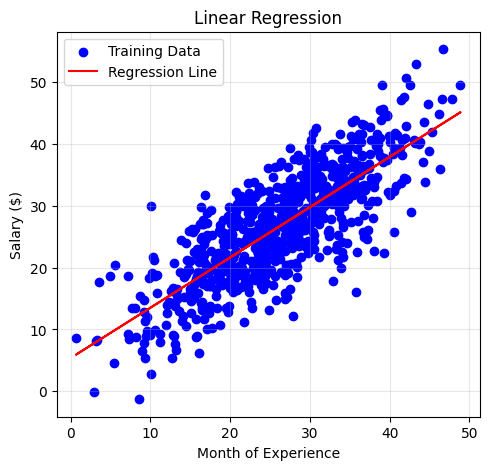

In [47]:
# Create visualization
plt.figure(figsize=(12, 5))

# Plot 1: Training data and regression line
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_train, regressor.predict(x_train), color='red', label='Regression Line')
plt.xlabel('Month of Experience')
plt.ylabel('Salary ($)')
plt.title('Linear Regression')

plt.legend()
plt.grid(True, alpha=0.3)

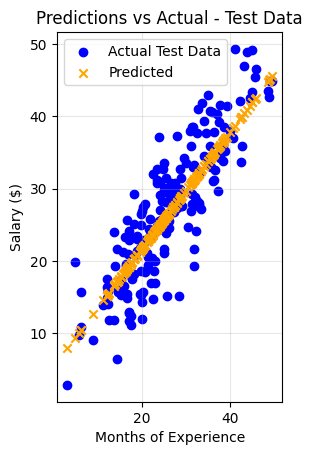

In [46]:
# Plot 2: Test data predictions
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, color='blue', label='Actual Test Data')
plt.scatter(x_test, y_pred, color='orange', label='Predicted', marker='x')
plt.xlabel('Months of Experience')
plt.ylabel('Salary ($)')
plt.title('Predictions vs Actual - Test Data')
plt.legend()
plt.grid(True, alpha=0.3)


> ### Try your prediction

In [51]:
print("\nSample Prediction:")
new_experience = np.array([[5*12]])  # Month of experience
predicted_salary = regressor.predict(new_experience)
print(f"   For {new_experience[0][0]} Month of experience:")
print(f"   Predicted Salary: ${predicted_salary[0]:,.2f} thousands")


Sample Prediction:
   For 60 Month of experience:
   Predicted Salary: $54.15 thousands
